# Phase 2 Noun Space

The motivation for this notebook can be found in the updates of the [readme](readme.md):

> Based on the output of the verb experiments in this phase, I see that it is not possible to simply build a space for only verbs or only nouns. Rather, these two spaces really need each other if there is any hope to obtain more defined word clusters. A fine example of the problem can be seen in the [phase2_clustering](http://nbviewer.jupyter.org/github/codykingham/semantics/blob/master/phase2_clustering.ipynb) notebook, where the noun יהוה and אלהים occur disproportionately as the subject with verbs like אנף "be angry," מטר "cause rain," and others. In reality, יהוה and אלהים both possess attributes which are common to other nouns, such as the collocability with action verbs. But because the space does not see these similarities, the lexemes are treated as completely separate entities. This is where the noun space can enter in and offer observations about the similarity of nouns with each other. By adding similar words to the space, based on a pre-calculated noun space, it is hoped that the knowledge gap can be bridged and lexemes with similar attributes considered together. This will allow, for instance, the noun אלהים, which also takes verbs like אמר, to be identified with other nouns that take the verb אמר.

The purpose of this notebook is to develop the noun space that will be used to enhance the verb space. A previous set of noun spaces were created in [phase 1](phase1/readme.md) of this project. In this notebook, we use the updated Experiment and Semantic classes which have much more flexibility to define target word and basis elements. One major difference between the old data gathering technique and this one is that coordinate nouns are counted using the coordinate relation (BHSA: `rel` = `par` or "parallel") instead of counting all nouns that are coordinated in a chain. This Experiment class can also easily record words contained within related subphrases, such as construct or appositional relations.

The enhanced classes allow much more informative data to be imported into the space (which will also require longer processing times). In the interest of building as useful a space as possible, proper nouns *will* be included in these spaces. This will allow proper nouns like יהוה to be compared with other nouns like אלהים. I will experiment with various parameters before deciding an a final experiment class to use for the verb space enhancement.

### Load Data

In [1]:
import numpy as np
import pandas as pd
import collections, os, sys, pickle
import matplotlib.pyplot as plt
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa
from project_code.noun_experiments import NounExperiment1
from project_code.semspace import SemSpace

bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c']
TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_initial_experiments', version='c')

This is Text-Fabric 3.4.10
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

116 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/Bhsa" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api" title="text-fabric-api">Text-Fabric API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api#search-template-introduction" title="Search Templates Introduction and Reference">Search Reference</a>

## Initial Experiments

In [2]:
ne1 = NounExperiment1(tf_api=tf_api)

In [3]:
ne1.data.shape

(6357, 2744)

In [4]:
ne1.data.head()

,<B/,<B=/,<BD/,<BD>/,<BDH/,<BDJHW/,<BDT/,<BDWN/,<BD[,<BD_>DWM/,...,ZQN==/,ZQNH/,ZQNJM/,ZR/,ZR</,ZR=/,ZRBBL/,ZRC/,ZRW</,ZRX=/
.Appo.<BD/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.Appo.<BRJ/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.Appo.<DH/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.Appo.<DH===/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.Appo.<FH[,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
ne1.data['MLK/'].sort_values(ascending=False).head(10)

Subj.Pred.>MR[.qal       111.0
.rec.JFR>L/               58.0
Cmpl_>L.Pred.>MR[.qal     36.0
.Appo.CLMH=/              32.0
Subj.Pred.CLX[.qal        30.0
.rec.BBL/                 24.0
.rec.>CWR/                23.0
Cmpl_>L.Pred.BW>[.qal     22.0
.Appo.DWD==/              20.0
Subj.Pred.CM<[.qal        19.0
Name: MLK/, dtype: float64

### Run the Semantic Space


In [6]:
ns1 = SemSpace(ne1, info=100000, run_ll=False)
#os.system('say "Cody! Your data is ready ready ready!"')

  0.00s Beginning all calculations...
  0.00s Skipping log-likelihood...
   |       17s FINISHED PMI...
  1.61s Formatting remaining data matrices...
    33s data gathering complete!


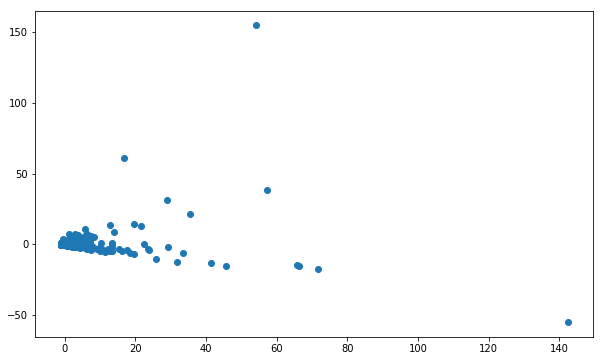

In [7]:
ns1.pmi_plot.show(annotate=False)

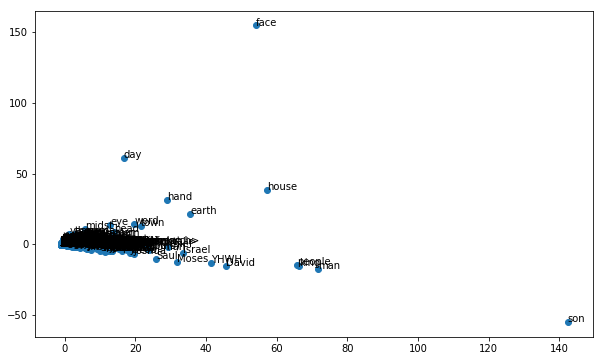

In [8]:
ns1.pmi_plot.show()

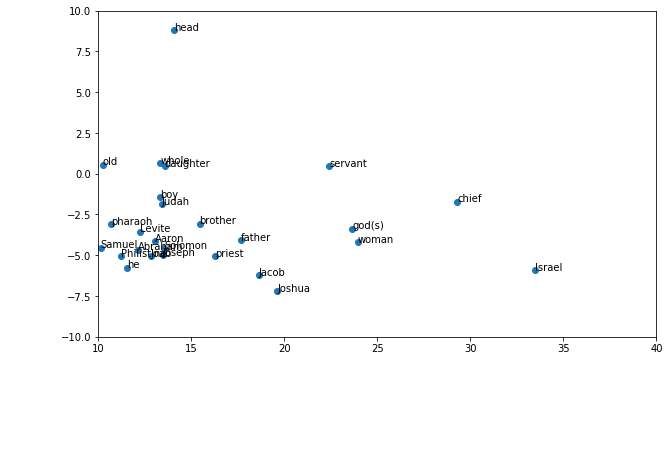

In [9]:
ns1.pmi_plot.show(axis=[10, 40, -10, 10])

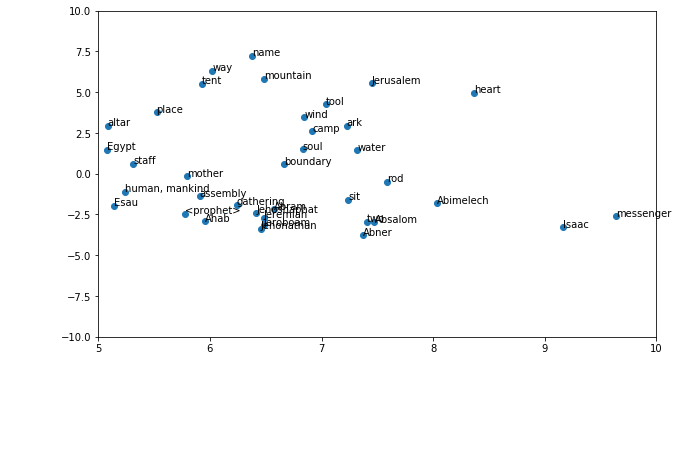

In [10]:
ns1.pmi_plot.show(axis=[5, 10, -10, 10])

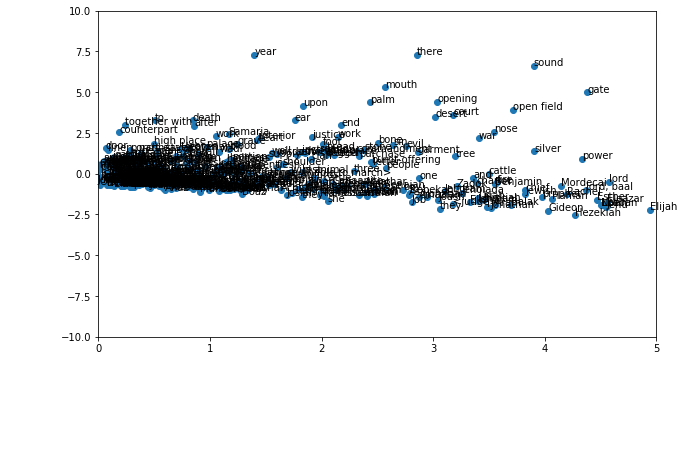

In [11]:
ns1.pmi_plot.show(axis=[0, 5, -10, 10])

In [12]:
ns1.similarity_pmi['<BD/ (servant)'].sort_values(ascending=False).head(20)

<BD/ (servant)         1.000000
CPXH/ (maidservant)    0.173587
FR/ (chief)            0.147803
N<R/ (boy)             0.147114
DWD==/ (David)         0.144321
MCH=/ (Moses)          0.142340
<M/ (people)           0.139854
XMWR=/ (Hamor)         0.136457
JWXNN/ (Johanan)       0.136007
>JC/ (man)             0.131039
>CH/ (woman)           0.129257
DWD/ (beloved one)     0.128532
J<QB/ (Jacob)          0.128516
MJKJHW/ (<prophet>)    0.126021
>DNJHW/ (Adonijah)     0.125881
C>WL=/ (Saul)          0.124912
CKM==/ (Shechem)       0.122873
HTK/ (Hathach)         0.120405
XM===/ (Ham)           0.120379
GD<WN/ (Gideon)        0.117246
Name: <BD/ (servant), dtype: float64

In [13]:
ns1.similarity_pmi['GML/ (camel)'].sort_values(ascending=False).head(20)

GML/ (camel)             1.000000
SWS/ (horse)             0.177168
Y>N/ (cattle)            0.155850
XMWR/ (he-ass)           0.139248
MR</ (friend)            0.138730
JRX</ (Jarha)            0.107635
XSJL/ (cockroach)        0.107635
NZJR/ (singled out)      0.107202
XJRM/ (Hiram)            0.102274
CBJ/ (captive)           0.097391
MNQJT/ (bowl)            0.094761
YR==/ (pebble)           0.094761
<RMWN/ (plane-tree)      0.094761
FHRNJM/ (<ornament>)     0.094761
MPTX/ (key)              0.094761
BRQNJM/ (<uncertain>)    0.094761
<RBWN/ (pledge)          0.094761
KRJ/ (Carites)           0.094761
CMY/ (<uncertain>)       0.094761
XRF/ (clay)              0.094761
Name: GML/ (camel), dtype: float64

In [14]:
ns1.similarity_pmi['JHWH/ (YHWH)'].sort_values(ascending=False).head(20)

JHWH/ (YHWH)            1.000000
>LHJM/ (god(s))         0.306938
MCH=/ (Moses)           0.189060
DWD==/ (David)          0.175075
MLK/ (king)             0.150585
JHWC</ (Joshua)         0.146551
C>WL=/ (Saul)           0.144447
PR<H/ (pharaoh)         0.135528
JHWJD</ (Jehoiada)      0.134539
JHWNTN/ (Jehonathan)    0.133916
JWSP/ (Joseph)          0.124478
ML>K/ (messenger)       0.118165
J<QB/ (Jacob)           0.113030
PL>[ (be miraculous)    0.111802
>BRHM/ (Abraham)        0.107784
>JC/ (man)              0.104848
JYXQ/ (Isaac)           0.102956
CLMH=/ (Solomon)        0.102680
GD<WN/ (Gideon)         0.101487
BLQ/ (Balak)            0.101394
Name: JHWH/ (YHWH), dtype: float64

In [15]:
ns1.similarity_pmi['LXM/ (bread)'].sort_values(ascending=False).head(20)

LXM/ (bread)                 1.000000
MSTR=/ (making hide face)    0.155798
QLH[ (roast)                 0.155305
JSDWT/ (foundation)          0.155305
YMWQJM/ (cakes)              0.119896
QDQD/ (scalp)                0.117817
TXNWN/ (supplication)        0.108627
BJNH/ (understanding)        0.108627
XCQ/ (desire)                0.094601
FQ/ (sack)                   0.092992
JBWL/ (produce)              0.092800
PTBG/ (table)                0.087161
MXJH/ (life preservation)    0.086997
RBBH/ (multitude)            0.086997
BFRH/ (report)               0.086997
MSWH/ (mask)                 0.086997
VRP==/ (food)                0.086997
BYR=/ (<place of refuge>)    0.086997
MSPW>/ (fodder)              0.086997
NQMH/ (vengeance)            0.086997
Name: LXM/ (bread), dtype: float64

In [16]:
ns1.similarity_pmi['MJM/ (water)'].sort_values(ascending=False).head(20)

MJM/ (water)            1.000000
GCM/ (rain)             0.151491
CKR=/ (strong drink)    0.127623
NQJWN/ (innocence)      0.126461
GBRT/ (lady)            0.123743
T<LH/ (channel)         0.118635
NZL[ (flow)             0.110102
YJR===/ (convulsion)    0.106192
JJN/ (wine)             0.099991
SR<PH/ (bough)          0.098279
PLYWT/ (shuddering)     0.094523
>LJL/ (god)             0.092918
CMH=/ (Shammah)         0.092416
MXCBT/ (plan)           0.092416
DRBN/ (point)           0.091453
JWYR/ (potter)          0.088858
HWD/ (splendour)        0.088502
RJR/ (spittle)          0.087697
KD/ (pitcher)           0.086183
CQWY/ (idol)            0.085679
Name: MJM/ (water), dtype: float64

How is "convulsion" similar to water?

In [17]:
ns1.raw['YJR===/'][ns1.raw['YJR===/'] > 0]

Subj.Pred.HPK[.nif    1.0
Name: YJR===/, dtype: float64

In [18]:
ns1.raw['MJM/']['Subj.Pred.HPK[.nif']

1.0

Both nouns share the attribute of being able to "be poured out." 

Looking at this noun's uses as described by BDB, it seems that this noun shares another surprising commonality with מים, that is, a person can be filled (מלא) with חלחלה צירים, that is, "anguish of pangs." Thus, in a surprising way this noun may be a good match.  

In [19]:
ns1.similarity_pmi['MLK/ (king)'].sort_values(ascending=False).head(20)

MLK/ (king)          1.000000
C>WL=/ (Saul)        0.228685
DWD==/ (David)       0.211558
CLMH=/ (Solomon)     0.176877
<M/ (people)         0.175929
FR/ (chief)          0.175884
>B/ (father)         0.170289
MCH=/ (Moses)        0.162353
GD<WN/ (Gideon)      0.158313
>JC/ (man)           0.156778
JRB<M/ (Jeroboam)    0.155543
PR<H/ (pharaoh)      0.154778
>X>B/ (Ahab)         0.154020
JHWC</ (Joshua)      0.152470
>BNR/ (Abner)        0.151580
JHWH/ (YHWH)         0.150585
BLQ/ (Balak)         0.150351
BN/ (son)            0.148134
CMW>L/ (Samuel)      0.146515
J<QB/ (Jacob)        0.145565
Name: MLK/ (king), dtype: float64

In [20]:
ns1.similarity_pmi['<JR/ (town)'].sort_values(ascending=False).head(20)

<JR/ (town)             1.000000
CMRWN/ (Samaria)        0.166600
>RY/ (earth)            0.162955
JRWCLM/ (Jerusalem)     0.145951
>JLWN==/ (Aijalon)      0.139683
RMH==/ (Ramah)          0.133557
BJT/ (house)            0.133282
BJT_LXM/ (Bethlehem)    0.125546
Y<R/ (Zoar)             0.116268
BJT_>L/ (Bethel)        0.113925
GBWL/ (boundary)        0.113191
<J=/ (Ai)               0.112061
XBWR/ (Habor)           0.107984
NJNWH/ (Nineveh)        0.106992
JRDN/ (Jordan)          0.106758
JBJC=/ (Jabesh)         0.106379
XYWR/ (Hazor)           0.100068
>BN_H<ZR/ (Ebenezer)    0.098965
MXNH/ (camp)            0.097195
XBRWN=/ (Hebron)        0.096961
Name: <JR/ (town), dtype: float64

In [21]:
ns1.similarity_pmi['JWM/ (day)'].sort_values(ascending=False).head(20)

JWM/ (day)                1.000000
CNH/ (year)               0.172729
LJLH/ (night)             0.146839
YHRJM/ (noon)             0.120189
XDC=/ (month)             0.119022
<T/ (time)                0.107654
BQR=/ (morning)           0.092602
MWT/ (death)              0.057799
MHWMH/ (discomfiture)     0.057730
<FWR/ (a ten)             0.056309
<RB/ (evening)            0.052641
<YM/ (bone)               0.051749
JWMM (by day)             0.051606
SR<PH/ (bough)            0.050906
TXLH/ (beginning)         0.048973
MWSK/ (<uncertain>)       0.048264
>Z (then)                 0.047378
XRPH/ (reproach)          0.046778
>GRT/ (letter)            0.043991
MVH====/ (crookedness)    0.043764
Name: JWM/ (day), dtype: float64

In [22]:
ns1.raw['JWM/'][ns1.raw['JWM/'] > 0].sort_values(ascending=False).head(10)

Time.Pred.<FH[.qal       17.0
.par.LJLH/               15.0
Time.Pred.JCB[.qal       14.0
Time_B.Pred.BW>[.qal     13.0
Time_<D.Pred.QR>[.qal     9.0
Time_<D.Pred.JCB[.qal     9.0
Time_B.Pred.>MR[.qal      7.0
Time_B.Pred.<FH[.qal      6.0
.rec.MWT/                 6.0
.rec.CLMH=/               5.0
Name: JWM/, dtype: float64

While יום performs quite well, it should be noted that this has much to do with the specialized "Time" phrase function type in the BHSA dataset.

In [24]:
ns1.similarity_pmi['VWB/ (good)'].sort_values(ascending=False).head(20)

VWB/ (good)               1.000000
MPJBCT/ (Mephibosheth)    0.230328
MJVB/ (best)              0.229013
HWH==/ (destruction)      0.218229
KR/ (ram)                 0.201405
>RZ/ (cedar)              0.192791
M<WN/ (dwelling)          0.169935
MWSB/ (<uncertain>)       0.166141
QCH/ (hard)               0.139688
MBXR/ (choice)            0.139523
>GG/ (Agag)               0.137632
MCL/ (proverb)            0.131955
KZB/ (lie)                0.126738
M>WMH/ (something)        0.124490
BXWR/ (young man)         0.103598
<NP/ (branches)           0.098513
NRGL/ (Nergal)            0.098513
CPV/ (judgment)           0.098513
CPWV/ (judgment)          0.098513
<YRT/ (assembly)          0.098513
Name: VWB/ (good), dtype: float64

In [25]:
ns1.similarity_pmi['>DMH/ (soil)'].sort_values(ascending=False).head(20)

>DMH/ (soil)                   1.000000
JLDH/ (girl)                   0.290437
MXYB/ (hewn stone)             0.283128
YJD=/ (provision)              0.254022
MLKJ_YDQ/ (Melchizedek)        0.205199
KWRC/ (Cyrus)                  0.205199
QNT/ (Kenath)                  0.186256
GMZW/ (Gimzo)                  0.186256
CW<L/ (fox)                    0.186256
BKRH/ (right of first-born)    0.184759
PQJD/ (officer)                0.165248
GDRWT/ (Gederoth)              0.153453
MNXM/ (Menahem)                0.148682
PCXWR/ (Pashhur)               0.143340
>ZWR/ (loin-cloth)             0.139423
CRT[ (serve)                   0.128320
>CQLWN/ (Ashkelon)             0.123239
>JLWN==/ (Aijalon)             0.098871
XLQH/ (plot of land)           0.095589
JRK/ (upper thigh)             0.093895
Name: >DMH/ (soil), dtype: float64

What does "soil" and "girl" have to do with each other?

In [26]:
ns1.raw['JLDH/'][ns1.raw['JLDH/'] > 0]

Objc.Pred.MKR[.qal    1.0
Name: JLDH/, dtype: float64

In [27]:
ns1.raw['>DMH/'][ns1.raw['>DMH/'] > 0]

.rec.JFR>L/              1.0
.rec.KHN/                2.0
.rec.MYRJM/              2.0
Adju_>L.Pred.FMX[.qal    1.0
Cmpl_MN.Pred.JYR[.qal    1.0
Cmpl_MN.Pred.YMX[.hif    1.0
Loca_<L.Pred.FJM[.qal    1.0
Objc.Pred.<BD[.qal       1.0
Objc.Pred.LKD[.qal       1.0
Objc.Pred.MKR[.qal       1.0
Objc.Pred.QNH[.qal       2.0
Subj.Pred.BQ<[.nif       1.0
Subj.Pred.JY>[.hif       1.0
Name: >DMH/, dtype: float64

Both of these items are sold!

In [28]:
ns1.similarity_pmi['KHN/ (priest)'].sort_values(ascending=False).head(20)

KHN/ (priest)           1.000000
LWJ/ (Levite)           0.420324
TWDH/ (thanksgiving)    0.163828
JW>B/ (Joab)            0.159339
MCH=/ (Moses)           0.159108
SRNJM/ (lords)          0.141355
CW<R/ (porter)          0.139888
>XJHW/ (Ahijah)         0.139297
J<QB/ (Jacob)           0.139089
DWD==/ (David)          0.138762
>HLJ>B/ (Oholiab)       0.137646
CM<JH/ (Shemaiah)       0.136178
JWNTN/ (Jonathan)       0.133991
BYL>L/ (Bezalel)        0.133524
>LJC</ (Elisha)         0.131635
TWL<=/ (Tola)           0.128916
QDMJ>L/ (Kadmiel)       0.127910
YRJ=/ (Tyrian)          0.127824
HJMN/ (Heman)           0.127777
MQR>/ (convocation)     0.127582
Name: KHN/ (priest), dtype: float64

In [30]:
ns1.similarity_pmi['TWDH/ (thanksgiving)'].sort_values(ascending=False).head(20)

TWDH/ (thanksgiving)    1.000000
>XR=/ (other)           0.638414
MTTJH/ (Mattithiah)     0.592446
<NJH/ (Anaiah)          0.592446
JXZJH/ (Jahzeiah)       0.548472
HJMN/ (Heman)           0.507243
KWMZ/ (breastplate)     0.491360
KRML=/ (new corn)       0.491360
CDD[ (despoil)          0.491360
MVWH/ (yarn)            0.491360
QDMJ>L/ (Kadmiel)       0.447745
CM<===/ (Shema)         0.407661
JTR[ (remain)           0.399249
MN<WL/ (lock)           0.375532
M<FJH/ (Maaseiah)       0.358390
RB_CQH/ (rabshake)      0.357286
XRBH=/ (ruin)           0.302235
NDBH/ (free will)       0.263502
<RLH/ (foreskin)        0.255629
XLQJH/ (Hilkiah)        0.231078
Name: TWDH/ (thanksgiving), dtype: float64

What is going on with this noun?

In [31]:
ns1.raw['TWDH/'][ns1.raw['TWDH/'] > 0]

Objc.Pred.<MD[.hif    1.0
Objc.Pred.BW>[.hif    1.0
Subj.Pred.<MD[.qal    1.0
Name: TWDH/, dtype: float64

In [32]:
ns1.raw['>XR=/'][ns1.raw['>XR=/'] > 0]

Objc.Pred.<MD[.hif    1.0
Name: >XR=/, dtype: float64

In [33]:
ns1.raw['MTTJH/'][ns1.raw['MTTJH/'] > 0]

Subj.Pred.<MD[.qal    1.0
Name: MTTJH/, dtype: float64

In [34]:
ns1.raw['KWMZ/'][ns1.raw['KWMZ/'] > 0]

Objc.Pred.BW>[.hif    1.0
Name: KWMZ/, dtype: float64

Thanksgiving can be "set up" עמד and "brought in" בוא, as with the other nouns.

In [35]:
ns1.similarity_pmi['CJR/ (song)'].sort_values(ascending=False).head(20)

CJR/ (song)                  1.000000
NBL==/ (harp)                0.466269
MS<D/ (<uncertain>)          0.422268
KNWR/ (cither)               0.373303
NGP/ (plague)                0.372354
PRY[ (break)                 0.372354
TP/ (tambourine)             0.278855
FMXH/ (joy)                  0.210454
MYLTJM/ (cymbals)            0.186282
TRW<H/ (shouting)            0.168041
RBBH/ (multitude)            0.137462
MGR<WT/ (recesses)           0.137462
BYR=/ (<place of refuge>)    0.137462
TPLH=/ (unseemliness)        0.137462
VRP==/ (food)                0.137462
C>LH/ (request)              0.137462
MKS/ (tax)                   0.137462
NQMH/ (vengeance)            0.137462
JRCH/ (possession)           0.137462
MXJH/ (life preservation)    0.137462
Name: CJR/ (song), dtype: float64

In what way is שיר "song" similar to נקף "plague"?

In [36]:
ns1.raw['CJR/'][ns1.raw['CJR/'] > 0]

.par.KNWR/               1.0
.par.TP/                 1.0
.par.XYYRH/              1.0
.rec.JHWH/               1.0
Adju_B.Pred.CLX[.piel    1.0
Objc.Pred.NTN[.qal       1.0
Subj.Pred.XLL[.hif       1.0
Name: CJR/, dtype: float64

In [37]:
ns1.raw['NGP/'][ns1.raw['NGP/'] > 0]

Subj.Pred.XLL[.hif    1.0
Name: NGP/, dtype: float64

In [38]:
ns1.raw['PRY['][ns1.raw['PRY['] > 0]

Subj.Pred.XLL[.hif    1.0
Name: PRY[, dtype: float64

These appear to due to this verb's polysemy, senses of both "play pipe" and "begin."

In [39]:
ns1.similarity_pmi['>KL/ (food)'].sort_values(ascending=False).head(20)

>KL/ (food)                  1.000000
MD</ (knowledge)             0.453580
BR/ (grain)                  0.290069
TQWPH/ (turning point)       0.271443
YMX/ (sprout)                0.245264
PQ<T/ (gourd)                0.220965
TCWBH/ (return)              0.215335
BFRH/ (report)               0.202142
RBBH/ (multitude)            0.202142
C>LH/ (request)              0.202142
MKS/ (tax)                   0.202142
NJR=/ (lamp)                 0.202142
MGR<WT/ (recesses)           0.202142
HRJWN/ (conception)          0.202142
NQMH/ (vengeance)            0.202142
CKBT/ (copulation)           0.202142
M<FR/ (tenth)                0.202142
TPLH=/ (unseemliness)        0.202142
TMNT_SRX/ (Timnath Serah)    0.202142
MZWN/ (food)                 0.202142
Name: >KL/ (food), dtype: float64

In [40]:
ns1.raw['>KL/'][ns1.raw['>KL/'] > 0]

.rec.CNH/              1.0
.rec.FDH/              1.0
Objc.Pred.C>L[.qal     1.0
Objc.Pred.CBR=[.qal    1.0
Objc.Pred.LQX[.qal     1.0
Objc.Pred.NTN[.qal     2.0
Objc.Pred.QBY[.qal     1.0
Name: >KL/, dtype: float64

In [41]:
ns1.raw['MD</'][ns1.raw['MD</'] > 0]

Objc.Pred.C>L[.qal    1.0
Objc.Pred.NTN[.qal    1.0
Name: MD</, dtype: float64

Both "food" and "knowlege" are requested (שאל) and given (נתן).

In [42]:
ns1.similarity_pmi['>MRH/ (word)'].sort_values(ascending=False).head(20)

>MRH/ (word)             1.000000
<DWT/ (reminder)         0.191211
MCMRT/ (guard-post)      0.178199
XQH/ (regulation)        0.152972
XSD/ (loyalty)           0.141881
MYWH/ (commandment)      0.119044
BRJT/ (covenant)         0.117517
TWRH/ (instruction)      0.110220
>RWN/ (ark)              0.067099
MCPV/ (justice)          0.060941
QYP/ (anger)             0.044791
DRK/ (way)               0.044426
ML>KWT/ (commission)     0.040317
DBR/ (word)              0.035282
BJT/ (house)             0.032363
PXD/ (trembling)         0.032188
TRDMH/ (sleep)           0.030860
QRBN/ (offering)         0.028997
MXCBH/ (thought)         0.028669
TRWMH/ (contribution)    0.027990
Name: >MRH/ (word), dtype: float64

In [43]:
ns1.similarity_pmi['ZQN/ (old)'].sort_values(ascending=False).head(20)

ZQN/ (old)             1.000000
FR/ (chief)            0.200672
FB<=/ (sated)          0.184833
HTK/ (Hathach)         0.147544
GB<WNJ/ (Gibeonite)    0.145503
BLQ/ (Balak)           0.145231
SRNJM/ (lords)         0.141493
QWY/ (thorn-bush)      0.140048
BJYH/ (egg)            0.138288
NGF[ (drive)           0.136232
LWJ/ (Levite)          0.129156
CPV[ (judge)           0.128719
BL<M/ (<prophet>)      0.125261
>JC/ (man)             0.123384
ZJPJ/ (Ziphite)        0.123160
CM<J=/ (Shimei)        0.122484
CW<H/ (cry)            0.122173
MBNH/ (structure)      0.120902
TQP/ (power)           0.120210
FVNH/ (accusation)     0.120210
Name: ZQN/ (old), dtype: float64

## Evaluation and Export

Some nouns perform quite well in terms of semantic similarity. Others reflect share only a small set of attributes that happen to be instantiated in the corpus, such as "give"-ability and "lift"-ability. Nevertheless, some very positive, strong tendencies can be seen in the data. The most relevant tendency is that personal nouns tend to have other personal nouns in their top similar terms; non-personal nouns likewise relate most to non-personal nouns. This particular quality will be especially important for clustering verbs into classes.

The noun space is successful for the purpose of enhancing the verb space. The pre-computed data has been made available in `data/ns1_pmi.pickle` and can be reloaded into the semantic space in the verb-space enhancement notebook.